In [1]:
#Import packages needed
import pandas as pd
import numpy as np

import requests
import re

from pprint import pprint

import matplotlib.pyplot as plt


In [2]:
# Bring in csv and look at data
nyc_jobs_csv = "Clean_and_complete_NYC_job_noComma.csv"
nyc_df = pd.read_csv(nyc_jobs_csv)
nyc_df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,New Lat,New Long,Formatted Address,Zip,Borough
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,110 William St_ New York_ NY 10038_ USA,10038,Manhattan
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,EXECUTIVE DIRECTOR_ BUSINESS DEVELOPMENT,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,110 William St_ New York_ NY 10038_ USA,10038,Manhattan
2,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,Finance_ Accounting_ & Procurement,F,...,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000,40.749357,-73.939062,42-09 28th St_ Long Island City_ NY 11101_ USA,11101,Queens
3,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,Health Public Safety_ Inspections_ & Enforcement,F,...,New York City residency is generally required ...,2013-12-20T00:00:00.000,NaN,2014-07-25T00:00:00.000,2019-07-30T00:00:00.000,40.734880,-73.863489,96-05 Horace Harding Expy_ Elmhurst_ NY 11373_...,11373,Queens
4,152738,LAW DEPARTMENT,Internal,1,Office Manager,CLERICAL ASSOCIATE,10251,3,Clerical & Administrative Support,F,...,New York City residency is generally required ...,2014-06-26T00:00:00.000,NaN,2014-06-26T00:00:00.000,2019-07-30T00:00:00.000,40.713299,-74.010110,100 Church St_ New York_ NY 10007_ USA,10007,Manhattan


In [ ]:
# List out all the columns
list(nyc_df)

In [3]:
plots_df = nyc_df.loc[:, ["Borough","Salary Range From", "Salary Range To","Salary Frequency"]]
plots_df.head()

,Borough,Salary Range From,Salary Range To,Salary Frequency
0,Manhattan,42405.0,65485.0,Annual
1,Manhattan,60740.0,162014.0,Annual
2,Queens,50598.0,85053.0,Annual
3,Queens,50623.0,75083.0,Annual
4,Manhattan,30683.0,49707.0,Annual


In [4]:
plots_df.dtypes

Borough               object
Salary Range From    float64
Salary Range To      float64
Salary Frequency      object
dtype: object

In [5]:
plots_groupby_borough = plots_df.groupby("Borough")[["Salary Range From", "Salary Range To"]].median()

In [6]:
#  df.groupby(df.date.dt.date)[['sentiment']].median()
plots_groupby_borough

,Salary Range From,Salary Range To
Borough,,
Brooklyn,62431.0,83545.5
Manhattan,57337.0,76000.0
Queens,58152.0,86238.0
Staten Island,47692.0,57161.0
The Bronx,59023.0,67876.0


In [8]:
# plots_groupby_borough["Salary Range From"] = plots_groupby_borough["Salary Range From"].map("${:,.2f}".format)
# plots_groupby_borough["Salary Range To"] = plots_groupby_borough["Salary Range To"].map("${:,.2f}".format)

In [7]:
plots_groupby_borough

,Salary Range From,Salary Range To
Borough,,
Brooklyn,62431.0,83545.5
Manhattan,57337.0,76000.0
Queens,58152.0,86238.0
Staten Island,47692.0,57161.0
The Bronx,59023.0,67876.0


In [10]:
# data1 = plots_groupby_borough["Salary Range From"]
# data2 = plots_groupby_borough["Salary Range To"]

# width = 0.3
# height = 3
# plt.bar(np.arange(len(data1)), width = width, height = height)
# plt.bar(np.arange(len(data2)), width = width, height = height)

# plt.ylabel("Median Salary")
# plt.title("Median Salary for Job Openings by Borough")

In [8]:
new_df = plots_groupby_borough.reset_index()
new_df

,Borough,Salary Range From,Salary Range To
0,Brooklyn,62431.0,83545.5
1,Manhattan,57337.0,76000.0
2,Queens,58152.0,86238.0
3,Staten Island,47692.0,57161.0
4,The Bronx,59023.0,67876.0


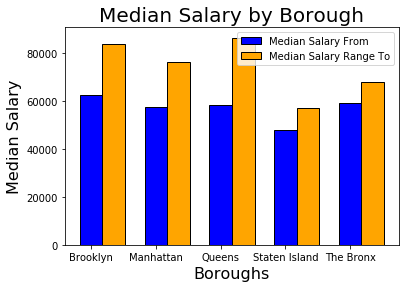

In [9]:
boroughs = new_df["Borough"]
pos = np.arange(len(boroughs))
data1=new_df["Salary Range From"]
data2 = new_df["Salary Range To"]
medians = ["Median Salary From", "Median Salary Range To" ]

bar_width = 0.35
 
plt.bar(pos,data1,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,data2,bar_width, color='orange',edgecolor='black')

plt.xticks(pos, boroughs)
plt.xlabel('Boroughs', fontsize=16)
plt.ylabel('Median Salary', fontsize=16)
plt.title('Median Salary by Borough',fontsize=20)
plt.legend(medians,loc="best")
plt.savefig("MedianSalBarchart.png")
plt.show()



In [10]:
new_df.dtypes

Borough               object
Salary Range From    float64
Salary Range To      float64
dtype: object

In [11]:
nyc_sector_csv = "completeAndCleanNycJobs_kh.csv"
nyc_sect = pd.read_csv(nyc_sector_csv)
nyc_sect.head()

,index,agency,numOfPositions,businessTitle,jobCategory,newLat,newLong,borough,salaryRangeTo,salaryRangeFrom,salaryFrequency,zip,jobCatCondensed
0,2,DEPT OF HEALTH/MENTAL HYGIENE,1,Contract Analyst,"Finance, Accounting, & Procurement",40.749357,-73.939062,Queens,85053.0,50598.0,Annual,11101.0,Other
1,3,DEPT OF ENVIRONMENT PROTECTION,1,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",40.734880,-73.863489,Queens,75083.0,50623.0,Annual,11373.0,Managerial and Professional
2,4,LAW DEPARTMENT,1,Office Manager,Clerical & Administrative Support,40.713299,-74.010110,Manhattan,49707.0,30683.0,Annual,10007.0,"Technical, Sales, and Administrative"
3,5,DEPT OF INFO TECH & TELECOMM,1,"Deputy Director, Audits and Accounts","Finance, Accounting, & Procurement",40.714463,-74.010980,Manhattan,60000.0,49492.0,Annual,10007.0,Other
4,6,NYC EMPLOYEES RETIREMENT SYS,1,"CERTIFIED IT ADMINISTRATOR (WAN), Level 4",Information Technology & Telecommunications,40.693463,-73.988245,Brooklyn,131623.0,87203.0,Annual,11201.0,Other


In [12]:
plots_sect = nyc_sect.loc[:, ["jobCatCondensed","salaryRangeFrom", "salaryRangeTo"]]
plots_sect

,jobCatCondensed,salaryRangeFrom,salaryRangeTo
0,Other,50598.00,85053.00
1,Managerial and Professional,50623.00,75083.00
2,"Technical, Sales, and Administrative",30683.00,49707.00
3,Other,49492.00,60000.00
4,Other,87203.00,131623.00
5,Other,87203.00,131623.00
6,"Technical, Sales, and Administrative",8.75,10.36
7,"Technical, Sales, and Administrative",8.75,10.36
8,"Technical, Sales, and Administrative",32086.00,51981.00
9,Other,43292.00,53000.00


In [13]:
sector_df = plots_sect.groupby("jobCatCondensed")[["salaryRangeFrom", "salaryRangeTo"]].median()

In [14]:
sector_plot = sector_df.reset_index()
sector_plot

,jobCatCondensed,salaryRangeFrom,salaryRangeTo
0,Managerial and Professional,55416.0,73309.0
1,Operatives and Laborers,42146.0,57764.0
2,Other,60435.0,85029.0
3,Service,55000.0,75000.0
4,"Technical, Sales, and Administrative",32888.0,53281.0


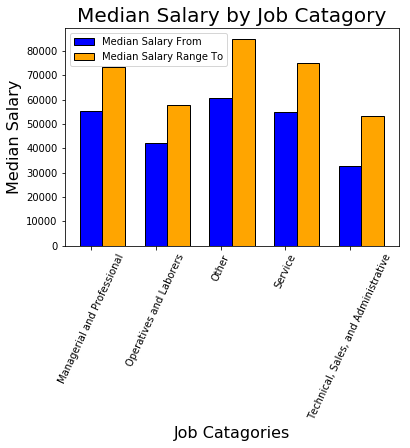

In [15]:
job_catagory = sector_plot["jobCatCondensed"]
pos = np.arange(len(job_catagory))
data1=sector_plot["salaryRangeFrom"]
data2 = sector_plot["salaryRangeTo"]
medians = ["Median Salary From", "Median Salary Range To" ]

bar_width = 0.35
 
plt.bar(pos,data1,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,data2,bar_width, color='orange',edgecolor='black')

plt.xticks(pos, job_catagory, rotation=65)
plt.xlabel('Job Catagories', fontsize=16)
plt.ylabel('Median Salary', fontsize=16)
plt.title('Median Salary by Job Catagory',fontsize=20)
plt.legend(medians,loc="best")
plt.savefig("SectorBarchart.png")
plt.show()

